<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Xavier_Glorat_And_He_Weight_Initialization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xavier/Glorat** and **He** are two types of Weight initialization techniques that can be used to initialize the weight values of the neural network.

Xavier/Glorat has two types -

**1)Normal and 2)Uniform**

He has two types -

**1)Noraml and 2)Uniform.**

It is obsrved practically that when you are working with tanh and sigmoid activation function , you should go with Xavier/Glorat weight initialization technique and when you are working with relu activation function then you should go with He weight initialization technique.

Xavier initilizaer for normal = under root of (1/fan_in) where fanin is the number of inputs coming to the node.

If we have to initialize 4 input weights,
then we create a formula as np.random.randn(2,2)*root of (1/2)

Now we will try to build a neural network model and initialize the weights by Xavier/Glorat weight initialization technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Dataset Used Is- https://www.kaggle.com/datasets/kartikparatkar/ushape

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


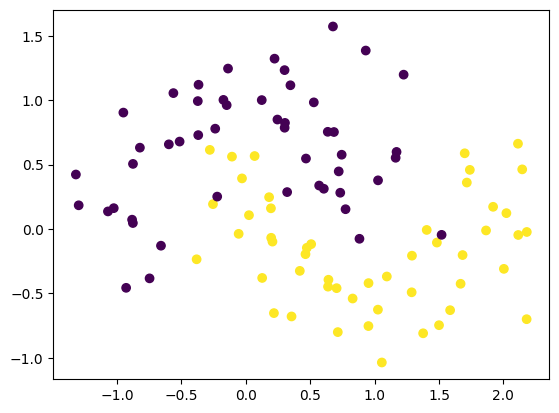

In [4]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [5]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [6]:
x

array([[ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,  0.17247329],
       [ 1.4834364 ,

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

#These are the weights initialized be keras inbuild library

[array([[-0.62824243, -0.01903623, -0.14831394, -0.5944376 , -0.5463703 ,
          0.60001427,  0.54724663,  0.56024164,  0.06059688, -0.42086932],
        [-0.27879363,  0.35240525, -0.28891042,  0.03366727, -0.22343478,
          0.21736515, -0.3536569 ,  0.44160336,  0.39069754,  0.13041413]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.90819830e-01,  1.04760110e-01, -3.19536805e-01,
         -4.71734524e-01,  2.05134034e-01,  5.14962673e-02,
         -5.15126169e-01, -2.94532597e-01,  1.47598684e-01,
          3.24669242e-01],
        [-7.33962953e-02, -8.67662132e-02, -4.64929610e-01,
          3.48822534e-01, -1.94123298e-01, -4.12673831e-01,
         -2.65169919e-01, -1.91543013e-01,  4.72064734e-01,
          6.07396364e-02],
        [ 4.90254760e-02, -2.44756013e-01,  5.98110557e-02,
         -4.96987700e-02,  3.52588415e-01,  4.28644121e-01,
         -3.94161403e-01,  5.36722183e-01,  4.96147990e-01,
         -2.7803498

In [10]:
initial_weights = model.get_weights()

**Now we will apply Xavier/Glorat formula to initilize the weights**

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()
#These are the new weight values set by Xavier/Glorat formula

[array([[ 0.04930868, -0.4563927 , -0.3185809 ,  0.22378536,  1.271753  ,
          0.42709222,  0.41637808, -1.821912  ,  0.00967585, -0.06699264],
        [ 1.4965065 , -0.56659406,  0.6335195 , -0.58283955, -1.2147641 ,
         -0.2877813 , -0.35113436,  0.48832908, -1.1568823 ,  0.58840597]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.04871806,  0.36030704,  0.14121234,  0.00880177, -0.10576353,
          0.18800373,  0.11088017,  0.4059595 , -0.34081063, -0.1719532 ],
        [-0.40658173,  0.03013552,  0.13748373,  0.09965672, -0.0208165 ,
         -0.05568201,  0.634002  ,  0.28695637, -0.21076365,  0.395688  ],
        [-0.05602309, -0.1282174 ,  0.46657905,  0.2980455 , -0.06829994,
          0.14926498, -0.58627063,  0.17219408, -0.16936804, -0.24833536],
        [ 0.2556605 ,  0.26098388, -0.11291762, -0.02073793,  0.44517055,
          0.45153144,  0.14463833, -0.47095743,  0.00889287,  0.14954932],
        [ 0.22845

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.2399 - loss: 0.8471 - val_accuracy: 0.1500 - val_loss: 0.8076
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.2447 - loss: 0.8094 - val_accuracy: 0.3000 - val_loss: 0.7724
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2808 - loss: 0.7821 - val_accuracy: 0.3500 - val_loss: 0.7388
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3028 - loss: 0.7456 - val_accuracy: 0.4000 - val_loss: 0.7071
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3789 - loss: 0.7091 - val_accuracy: 0.6000 - val_loss: 0.6772
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3939 - loss: 0.6892 - val_accuracy: 0.6000 - val_loss: 0.6484
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5525 - loss: 0.6620 - val_accuracy: 0.8000 - val_loss: 0.6209
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6904 - loss: 0.6425 - val_accuracy: 0.8500 - val_los

In [16]:
model.get_weights()
#Observe the weight values have been changed significantly

[array([[-0.04551518, -0.49753505, -0.3683973 ,  0.30065817,  1.4573867 ,
          0.44808087,  0.354983  , -2.0527005 , -0.06077893, -0.12586069],
        [ 1.5054147 , -0.5177473 ,  0.6862286 , -0.62376213, -1.1755064 ,
         -0.35777703, -0.35560256,  0.5337723 , -1.1018058 ,  0.58616185]],
       dtype=float32),
 array([-0.01209359, -0.09993885,  0.0436844 , -0.00051115, -0.16985115,
         0.00870587,  0.09539448,  0.26767635, -0.01260054,  0.00811075],
       dtype=float32),
 array([[ 0.0626472 ,  0.44711357,  0.1468724 ,  0.05973608, -0.01157931,
          0.13667388,  0.16019832,  0.44234502, -0.4154355 , -0.13246967],
        [-0.40363148, -0.01599044,  0.13739946,  0.05553249, -0.02456772,
         -0.05042674,  0.6354175 ,  0.30090553, -0.16273491,  0.40234688],
        [-0.10199954, -0.02219014,  0.5408525 ,  0.37517035,  0.01530581,
          0.05006156, -0.5427496 ,  0.2611843 , -0.2981751 , -0.28828746],
        [ 0.2980091 ,  0.15707469, -0.18720365, -0.09797638, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

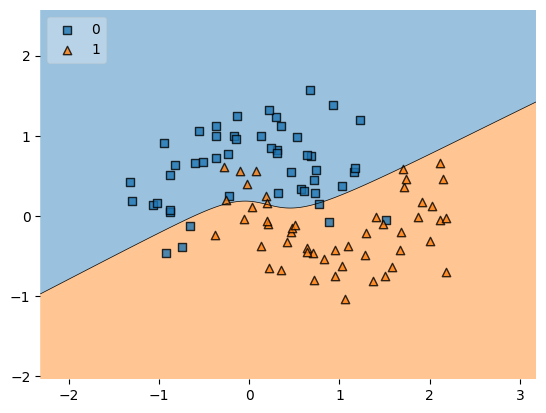

In [17]:
#Plot the boundary region
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

Here observe that we got somewhat better result. We dont see any kind of overfitting in this model.It is better capturing the non-linearity in the data and hopefully it will work better on unseen data.

**He Normal Weight Initialization Technique-**

He normal technique of weight initialization is used in case of relu activation function.

Formula for He normal is as follows-

under root of (2/fan_in) where fan_in is the number of inputs coming in the node.

**Xavier/Glorat Uniform Distribution formula-**

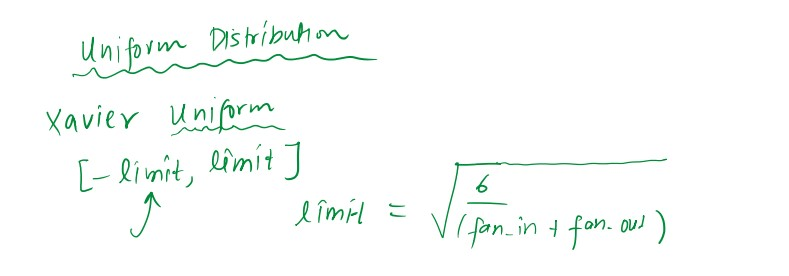

**He Uniform Formula-**

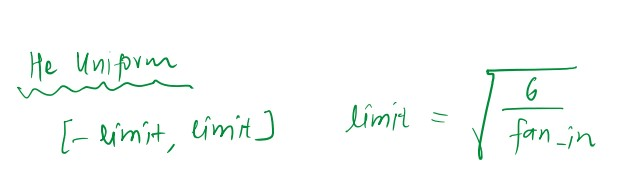
